In [2]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
def Annexinfunc(x,a,b):
    return (a + b*x)
    
    #return (a + b*(x-np.log(100)))

In [4]:
data_folder = '/Users/sns9/Research/GrowthCurves/Annexin/'
os.chdir(data_folder)

In [5]:
#v_data = pd.read_csv('Viability_T1-ATP-fit.csv',)
v0 = pd.read_csv('CombinedAnnexins165.csv').to_numpy()
#v24 = pd.read_csv('Tblue-T2-24.csv').to_numpy()
#v48 = pd.read_csv('Tblue-T2-48.csv').to_numpy()
#v72 = pd.read_csv('Tblue-T2-72.csv').to_numpy()

print(v0.shape)

(13, 4)


In [16]:
#popt, pcov = optim.curve_fit(ATPfunc,np.log(v24[:,0]),np.log(v24[:,3]))
popt, pcov = optim.curve_fit(Annexinfunc,v0[:,3],v0[:,0])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

[394.01585467  -2.60432556]
[517.80883118   5.29633733]


In [6]:
aa = np.linspace(65,95,100)
T2aa = Annexinfunc(aa,popt[0],popt[1])

In [7]:
popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
opt_ll[2] -= perr[2]

tb24 = np.linspace(70,100,501)
#tb24 = math.exp(1)**l_tb24
ts24 = TBfunc(tb24,popt[0])

#print(ts7)

t_ul24 = TBfunc(tb24,popt_ul[0])
t_ll24 = TBfunc(tb24,popt_ll[0])

#print(ts24)

NameError: name 'opt_ul' is not defined

In [21]:
rgba_colors = 0.5*np.ones((6,4))
alphas = np.linspace(0.1, 1, 6)
rgba_colors[:,3] = alphas
rgba_colors[:,3] = alphas
print(v0.shape)

print(v0[10:,3],v0[10:,0])

(14, 7)
[91.5 88.5 81.  69. ] [ 83.62556256  98.6919892  159.6370837  204.7963996 ]


In [6]:
weight1 = pd.Series([0.2, 0.3, 0.5, 0.7])
colors1 = weight1.apply(lambda x: (0,0,0,x)).tolist()

weight2 = pd.Series([0.2, 0.5, 0.7])
colors2 = weight2.apply(lambda x: (0,0,0,x)).tolist()

weight3 = pd.Series([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
colors3 = weight3.apply(lambda x: (0,0,0,x)).tolist()

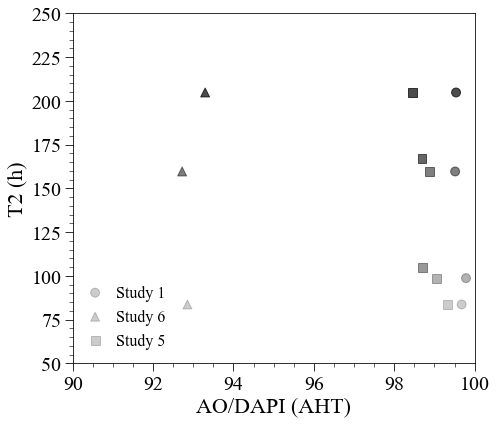

In [7]:
fig, axs = plt.subplots(figsize=(7,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

#plt.errorbar(v0[:,0],v0[:,3],v0[:,4],v0[:,1],fmt='o',lw=2,alpha=0.5,mew=2,ms=10,color='#000000',capsize=5,capthick=1,label='0 h')
plt.scatter(v0[:4,3],v0[:4,0],marker='o',s=80,c=colors1,label='Study 1')
plt.scatter(v0[4:7,3],v0[4:7,0],marker='^',s=80,c=colors2,label='Study 6')
plt.scatter(v0[7:,3],v0[7:,0],marker='s',s=80,c=colors3,label='Study 5')
#plt.plot(v0[:,3],v0[:,0],marker='o',linewidth=0,ms=8,c=rgba_colors,mew=0)
#plt.plot(aa,T2aa,linewidth=2,color='#000000',alpha=0.5,label=r'$(518.3 \pm 76.1) - (4.6 \pm 0.9)[A_H]$')

#plt.errorbar(v24[:,0],v24[:,3],v24[:,4],v24[:,1],fmt='^',lw=2,alpha=0.5,mew=2,ms=10,color='r',capsize=5,capthick=1,label='24 h')
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)
#plt.plot(tb24,ts24,linewidth=1.5,color='c',alpha=0.9,label=r'460$(1-e^{-0.09[\mathrm{TBlue}]})$')
#plt.fill_between(tb24,t_ll24,t_ul24,color='c',alpha=0.2)

#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='d',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='^',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'AO/DAPI (AHT)',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
plt.xlim(90,100)
plt.ylim(50,250)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 16},markerscale=1.0,handlelength=1.0,loc='lower left')
plt.tight_layout()

plt.savefig('CombinedAnnexinHealthy-165.png',dpi=600)

In [7]:
popt, pcov = optim.curve_fit(Annexinfunc,v0[:,4],v0[:,0])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

ae = np.linspace(0,20,100)
T2ae = Annexinfunc(ae,popt[0],popt[1])

IndexError: index 4 is out of bounds for axis 1 with size 4

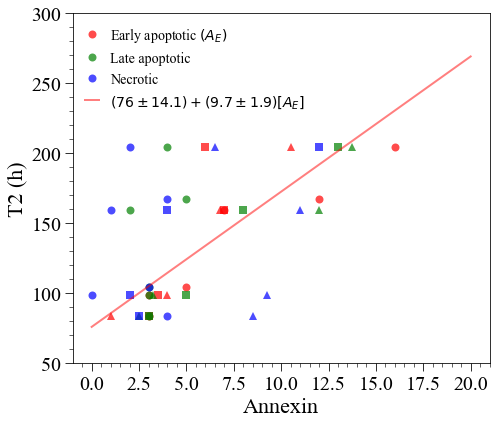

In [35]:
fig, axs = plt.subplots(figsize=(7,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

#plt.errorbar(v0[:,0],v0[:,3],v0[:,4],v0[:,1],fmt='o',lw=2,alpha=0.5,mew=2,ms=10,color='#000000',capsize=5,capthick=1,label='0 h')
plt.plot(v0[:6,4],v0[:6,0],marker='o',linewidth=0,ms=8,color='r',alpha=0.7,label=r'Early apoptotic $(A_E)$',mew=0)
plt.plot(v0[6:10,4],v0[6:10,0],marker='^',linewidth=0,ms=8,color='r',alpha=0.7,mew=0)
plt.plot(v0[10:,4],v0[10:,0],marker='s',linewidth=0,ms=8,color='r',alpha=0.7,mew=0)

plt.plot(v0[:6,5],v0[:6,0],marker='o',linewidth=0,ms=8,color='g',alpha=0.7,label='Late apoptotic',mew=0)
plt.plot(v0[6:10,5],v0[6:10,0],marker='^',linewidth=0,ms=8,color='g',alpha=0.7,mew=0)
plt.plot(v0[10:,5],v0[10:,0],marker='s',linewidth=0,ms=8,color='g',alpha=0.7,mew=0)

plt.plot(v0[:6,6],v0[:6,0],marker='o',linewidth=0,ms=8,color='b',alpha=0.7,label='Necrotic',mew=0)
plt.plot(v0[6:10,6],v0[6:10,0],marker='^',linewidth=0,ms=8,color='b',alpha=0.7,mew=0)
plt.plot(v0[10:,6],v0[10:,0],marker='s',linewidth=0,ms=8,color='b',alpha=0.7,mew=0)

plt.plot(ae,T2ae,linewidth=2,color='r',alpha=0.5,label=r'$(76 \pm 14.1) + (9.7 \pm 1.9)[A_E]$')

#plt.errorbar(v24[:,0],v24[:,3],v24[:,4],v24[:,1],fmt='^',lw=2,alpha=0.5,mew=2,ms=10,color='r',capsize=5,capthick=1,label='24 h')
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)
#plt.plot(tb24,ts24,linewidth=1.5,color='c',alpha=0.9,label=r'460$(1-e^{-0.09[\mathrm{TBlue}]})$')
#plt.fill_between(tb24,t_ll24,t_ul24,color='c',alpha=0.2)

#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='d',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='^',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'Annexin',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
#plt.xlim(70,100)
plt.ylim(50,300)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 14},markerscale=1.0,handlelength=1.0,loc='upper left')
plt.tight_layout()

plt.savefig('CombinedAnnexin-all-30.png',dpi=600)

In [13]:
xs = v_data['AODAPI'].to_numpy()
max_atp = np.max(xs)
print(xs)

[91.04825156 90.41634933 85.12091253 78.79769836 77.35471704 65.48592972
 62.26655348 96.18375836 94.70832686 89.54151808 83.75735913 71.58916709
 68.47107004 97.0877899  91.58067542 77.32832916 61.26893939 91.72106306
 94.21362799 63.61224296 64.17491872]


In [14]:
x_data = np.zeros(shape=(n_data*xs.shape[0],))
y_data = np.zeros(shape=(n_data*xs.shape[0],))

n = 0

for k in list(v_data):
    if 'T2' in k:
        x_data[n:n+xs.shape[0]] = xs #- ATP_offset
        y_data[n:n+xs.shape[0]] = v_data[k].to_numpy()
        
        n += xs.shape[0]
        
print(x_data,y_data)

[91.04825156 90.41634933 85.12091253 78.79769836 77.35471704 65.48592972
 62.26655348 96.18375836 94.70832686 89.54151808 83.75735913 71.58916709
 68.47107004 97.0877899  91.58067542 77.32832916 61.26893939 91.72106306
 94.21362799 63.61224296 64.17491872] [ 74.93339334 122.590459   104.1071107  164.4527453  150.7650765
 193.5265527  443.6012601  102.3087309   80.82808281  85.02430243
 126.7866787  147.2682268  178.0405041   93.01710171 112.9990999
 193.4266427  212.209721    71.63636364  72.13591359 159.6570657
 190.129613  ]


In [15]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(x_data),np.log(y_data))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

[ 4.34060711 -2.38624714]
[0.09083485 0.32891399]


In [16]:
#atp_array = np.log(np.linspace(0.2,0.8,51))#-ATP_offset)
atp_array = np.log(np.linspace(60,100,51))#-ATP_offset)
ts = math.exp(1)**ATPfunc(atp_array,popt[0],popt[1])

t_ul = math.exp(1)**ATPfunc(atp_array,popt_ul[0],popt_ul[1])
t_ll = math.exp(1)**ATPfunc(atp_array,popt_ll[0],popt_ll[1])

#atp_array = np.log(np.linspace(90,100,41))

total_data = np.zeros(shape=(ts.shape[0],4))
total_data[:,0] = math.exp(1)**atp_array #+ ATP_offset
total_data[:,1] = ts
total_data[:,2] = t_ul - ts
total_data[:,3] = ts - t_ll

cols = ['x','y','+','-']
solved_data = pd.DataFrame(total_data,columns=cols)
solved_data.to_csv('pairedAODAPIT2_fit-24-g.csv',index=None)
#solved_data.to_csv('paired-AODAPI_fit-24-g.csv',index=None)

#np.savetxt('viability_fit-60.csv',total_data,delimiter=',')